# **Import Dependecies**

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from tabulate import tabulate 
from IPython.display import clear_output
import textwrap

# **Data Source**

this dataset is sourced from `kaggle`, the dataset provides comprehensive data related to credit applications, allowing analyst to devlop models to predict the likelihood of repayement.

- Dataset Link : https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# **Data Loading & Explaining**

In [2]:
data = pd.read_csv(r"C:\Users\amine\Desktop\Gestion des Projets\Credit Risk Assessment Model\Data\credit_risk_dataset.csv")

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        :root {
            --primary-color: #007d3c;
            --light-bg: #ddefdd;
            --lighter-bg: #f3faf3;
            --text-color: #333;
            --border-radius: 12px;
            --shadow: 0 6px 12px rgba(0, 0, 0, 0.1);
            --transition: all 0.3s ease;
        }
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            color: var(--text-color);
            background-color: #f9f9f9;
        }
        .header {
            background-color: var(--light-bg);
            padding: 20px;
            border-radius: var(--border-radius);
            text-align: center;
            margin-bottom: 20px;
            box-shadow: var(--shadow);
            transition: var(--transition);
        }
        .header h1 {
            color: var(--primary-color);
            font-size: 28px;
            margin: 0;
            font-weight: 600;
            text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);
        }
        .content {
            background-color: var(--lighter-bg);
            padding: 25px;
            border-radius: var(--border-radius);
            box-shadow: var(--shadow);
            transition: var(--transition);
        }
        ul {
            padding-left: 20px;
        }
        li {
            margin-bottom: 12px;
        }
        li:last-child {
            margin-bottom: 0;
        }
        li b {
            color: var(--primary-color);
            font-weight: 600;
        }
        ul ul {
            margin-top: 8px;
            margin-bottom: 8px;
        }
        ul ul li {
            margin-bottom: 6px;
            padding-left: 5px;
            font-size: 14px;
            color: #555;
        }
        .feature-item {
            padding: 10px 0;
            border-bottom: 1px solid #e0f5e5;
        }
        .feature-item:last-child {
            border-bottom: none;
        }
        @media (max-width: 600px) {
            body {
                padding: 10px;
            }
            .header, .content {
                padding: 15px;
            }
            .header h1 {
                font-size: 24px;
            }
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Feature Descriptions</h1>
    </div>
    <div class="content">
        <ul>
            <li class="feature-item"><b>person_age:</b> Age of the individual applying for the loan.</li>
            <li class="feature-item"><b>person_income:</b> Annual income of the individual.</li>
            <li class="feature-item">
                <b>person_home_ownership:</b> Type of home ownership of the individual.
                <ul>
                    <li>rent: The individual is currently renting a property.</li>
                    <li>mortgage: The individual has a mortgage on the property they own.</li>
                    <li>own: The individual owns their home outright.</li>
                    <li>other: Other categories of home ownership that may be specific to the dataset.</li>
                </ul>
            </li>
            <li class="feature-item"><b>person_emp_length:</b> Employment length of the individual in years.</li>
            <li class="feature-item"><b>loan_intent:</b> The intent behind the loan application.</li>
            <li class="feature-item">
                <b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
                <ul>
                    <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                    <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                    <li>C: The borrower's creditworthiness is moderate.</li>
                    <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                    <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                    <li>F: The borrower poses a significant credit risk.</li>
                    <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
                </ul>
            </li>
            <li class="feature-item"><b>loan_amnt:</b> The loan amount requested by the individual.</li>
            <li class="feature-item"><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
            <li class="feature-item">
                <b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
                <ul>
                    <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                    <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
                </ul>
            </li>
            <li class="feature-item"><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
            <li class="feature-item">
                <b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
                <ul>
                    <li>Y: The individual has a history of defaults on their credit file.</li>
                    <li>N: The individual does not have any history of defaults.</li>
                </ul>
            </li>
            <li class="feature-item"><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
        </ul>
    </div>
</body>
</html>

# **Initial Data Exploration**

## Data info

In [4]:
# Display data info 
def display_data_info(data):
    """
    Display organized information about the dataset.
    """
    print("Basic Infromation of dataset:")
    info_df = pd.DataFrame(data.dtypes, columns = ['Dtypes'])
    info_df['Non_Null Count'] = data.notnull().sum()
    info_df['Null Count'] = data.isnull().sum()
    info_df['Null Percentage'] = (data.isnull().sum()/len(data) * 100).round(2)
    print(tabulate(info_df, headers = 'keys', tablefmt = 'psql'))
    print("\n")

In [5]:
display_data_info(data)

Basic Infromation of dataset:
+----------------------------+----------+------------------+--------------+-------------------+
|                            | Dtypes   |   Non_Null Count |   Null Count |   Null Percentage |
|----------------------------+----------+------------------+--------------+-------------------|
| person_age                 | int64    |            32581 |            0 |              0    |
| person_income              | int64    |            32581 |            0 |              0    |
| person_home_ownership      | object   |            32581 |            0 |              0    |
| person_emp_length          | float64  |            31686 |          895 |              2.75 |
| loan_intent                | object   |            32581 |            0 |              0    |
| loan_grade                 | object   |            32581 |            0 |              0    |
| loan_amnt                  | int64    |            32581 |            0 |              0    |
| loan_int

**Dataset Overview**  
The dataset contains 32,581 entries, indicating robust data collection for financial and personal attributes. Notable points:

**Missing Data:**  
- **person_emp_length**: 2.75% missing. Given its relatively low percentage, median imputation is statistically robust and minimally impacts the distribution.
- **loan_int_rate**: 9.56% missing. This significant proportion requires investigation to understand if the missingness is random or systematic.

**Recommendations**  
- **For person_emp_length**: Use median imputation to address missing values due to its robustness against outliers.
- **For loan_int_rate**: Explore the data to understand the nature of missingness before deciding on imputation or removal to maintain data integrity.


## Statistic descriptive

In [6]:
# Display the descriptive stats 
def descriptive_stats(data, round_digit = 2):
    """
    Display descriptive statistics of the dataset in a table format, seperated by data types.
    """
    int_data = data.select_dtypes(include = ['int64'])
    float_data = data.select_dtypes(include = ['float64'])
    categorical_data = data.select_dtypes(include = ['object', 'category'])

    # Display statistics for float features
    if not float_data.empty:
        print('Descriptive Statistics for float features:')
        print(tabulate(float_data.describe().round(round_digit), headers='keys', tablefmt='psql'))
        print("\n")
   
    # Display statistics for int features
    if not float_data.empty:
        print('Descriptive Statistics for int features:')
        print(tabulate(int_data.describe().round(round_digit), headers='keys', tablefmt='psql'))
        print("\n")

        
    # Display statistics for categorical features
    if not float_data.empty:
        print('Descriptive Statistics for categorical features:')
        cat_stats = categorical_data.describe()
        print(tabulate(cat_stats, headers = 'keys', tablefmt = 'psql'))
        print("\n")

In [7]:
descriptive_stats(data)

Descriptive Statistics for float features:
+-------+---------------------+-----------------+-----------------------+
|       |   person_emp_length |   loan_int_rate |   loan_percent_income |
|-------+---------------------+-----------------+-----------------------|
| count |            31686    |        29465    |              32581    |
| mean  |                4.79 |           11.01 |                  0.17 |
| std   |                4.14 |            3.24 |                  0.11 |
| min   |                0    |            5.42 |                  0    |
| 25%   |                2    |            7.9  |                  0.09 |
| 50%   |                4    |           10.99 |                  0.15 |
| 75%   |                7    |           13.47 |                  0.23 |
| max   |              123    |           23.22 |                  0.83 |
+-------+---------------------+-----------------+-----------------------+


Descriptive Statistics for int features:
+-------+--------------+--

**Descriptive Statistics Interpretation**  
**Key Observations and Statistics**

**Float Features:**

- **person_emp_length**: Average of 4.79 years, but a maximum of 123 years suggests significant *outliers*.

- **loan_int_rate**: Averages 11.01% with a notable range indicating diverse loan terms.

- **loan_percent_income**: Averages 17% but reaches up to 83%, highlighting potential *high financial burden*.

**Integer Features:**

- **person_age**: Ranges significantly from 20 to 144 years, suggesting *data inaccuracies*.

- **person_income**: Extensive range from `$4,000` to `$6,000,000`, indicative of *outliers* or varied financial statuses.

- **loan_amnt**: Typical range for personal loans, with an upper limit of `$35,000`.

- **loan_status**: 22% default rate, critical for *risk assessment*.

- **cb_person_cred_hist_length**: Varies from 2 to 30 years, showing diverse credit histories.

**Categorical Features:**

- **person_home_ownership**: `'RENT'` dominates, potentially affecting loan conditions.

- **loan_intent**: `'EDUCATION'` is the most common purpose, suggesting targeted financial needs.

- **loan_grade**: Predominantly `'A'`, indicating *low-risk profiles*.

- **cb_person_default_on_file**: Majority without default, good for credit analysis.

---

**Visualization Recommendations**

- **Histograms or Boxplots** for `person_emp_length`, `person_age`, and `person_income` to identify and understand *outliers* and distributions. These plots are effective for visualizing numerical data spread and can highlight issues like *unrealistic max values* or *skewed distributions*.


## Target Distribution

In [8]:
# Check data balance 
def check_target_distribution(data, target_column, round_digit=2):
    """
    Check the Distribution of the target variable
    """
    if target_column in data.columns:
        distribution = data[target_column].value_counts(normalize=True).round(round_digit) * 100
        print(f"Distribution of the Target variable '{target_column}':")
        print(tabulate(distribution.reset_index(),headers = ['Value', 'Percentage (%)'], tablefmt = 'psql'))
        print("\n")

    else: 
        print("Target column not found in the dataset")

In [9]:
check_target_distribution(data,'loan_status')

Distribution of the Target variable 'loan_status':
+----+---------+------------------+
|    |   Value |   Percentage (%) |
|----+---------+------------------|
|  0 |       0 |               78 |
|  1 |       1 |               22 |
+----+---------+------------------+




**Target Distribution Interpretation**  
The target variable is *imbalanced*, with 78% non-defaults and 22% defaults. This 56% gap can lead to *biased model predictions* toward the majority class, reducing *recall on defaults* (the minority class).

**Recommendation**  
To address the imbalance without losing information:

- **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic examples for the minority class based on feature-space similarity, preserving dataset size.

- **Class weights**: Adjusts algorithmic focus by penalizing misclassification of the minority class more, suitable for tree-based or logistic models.

These methods help improve *model sensitivity* to defaults without dropping data, ensuring better generalization.

**Visualization Recommendation**  
Bar chart of `loan_status` to illustrate the *class imbalance* clearly and support the decision to apply balancing techniques.


# **Initial Data Visualization**

## BoxPlot

In [23]:
def create_boxplot(data, var):
    """Create a simple boxplot for the given variable, ignoring missing values."""
    
    # Clear any existing plots in the notebook
    clear_output(wait=True)  # Clears the previous output to avoid duplicate plots
    
    # Remove missing values from the data for the specific variable
    data_clean = data[var].dropna()  # This drops rows where 'var' has NaN values
    
    # Check if the data is constant (no variation)
    if data_clean.nunique() == 1:
        print(f"Warning: The variable {var} is constant and has no variation.")
        return None

    # Step 1: Visualize the raw distribution using a boxplot (without log transformation)
    fig, ax = plt.subplots(figsize=(10, 6))  # Ensure we create a new figure and axes object
    sns.boxplot(x=data_clean, ax=ax)
    
    # Step 2: Professional Formatting
    plt.style.use('ggplot')  # Use ggplot for a clean style
    plt.rcParams.update({
        'font.family': 'DejaVu Sans',
        'axes.labelweight': 'bold',
        'axes.titlepad': 20,
        'axes.titlesize': 14,
        'axes.titleweight': 'semibold'
    })
    
    # Step 3: Apply title and labels
    ax.set_title(f'Boxplot of {var.replace("_", " ").title()}', fontsize=16)
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Values', fontsize=12)
    
    # Step 4: Display the plot only once
    plt.tight_layout()  # Make sure the plot fits nicely without extra space
    plt.show()

    return plt


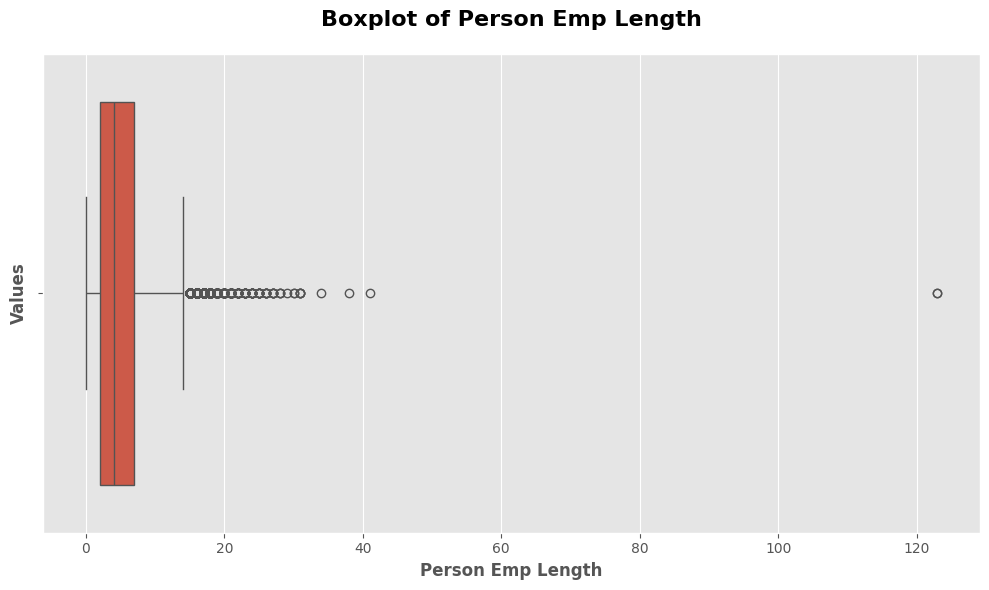

<module 'matplotlib.pyplot' from 'C:\\Users\\amine\\Desktop\\Gestion des Projets\\Credit Risk Assessment Model\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [25]:
create_boxplot(data, "person_emp_length") 

**person_emp_length (Years)**  
The distribution is skewed with a long right tail. Most values cluster below 20 years, but a few exceed 50 years, with one value beyond 120, which is logically and biologically invalid.

These entries likely stem from data entry mistakes or unit misalignment (e.g., months recorded as years).

**Recommendation:**  
Define a domain-informed upper cap (e.g., 50 years). For highly implausible values, apply outlier flagging and targeted cleaning during preprocessing.

---


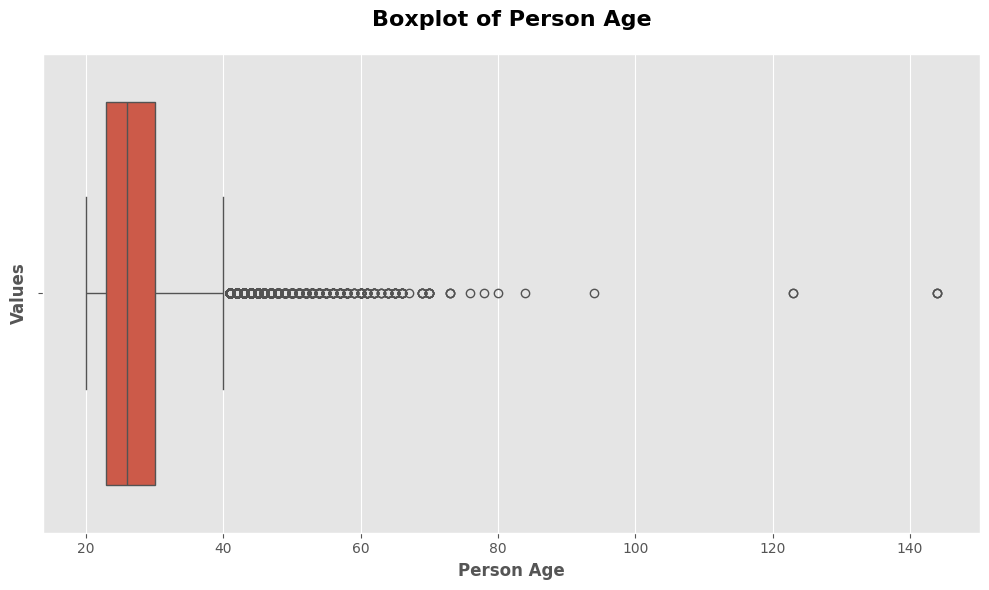

<module 'matplotlib.pyplot' from 'C:\\Users\\amine\\Desktop\\Gestion des Projets\\Credit Risk Assessment Model\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [26]:
create_boxplot(data, "person_age") 

**person_age**  
While most values lie within a realistic working-age range (20–60), the presence of values above 100 years (up to 144) is statistically implausible and violates real-world constraints.

These records distort age-related patterns and could bias risk assessments if not properly addressed.

**Recommendation:**  
Cap values at a realistic upper bound (e.g., 100 years) or treat them as data entry errors. Consider flagging for domain-driven exclusion if confirmed invalid.

---

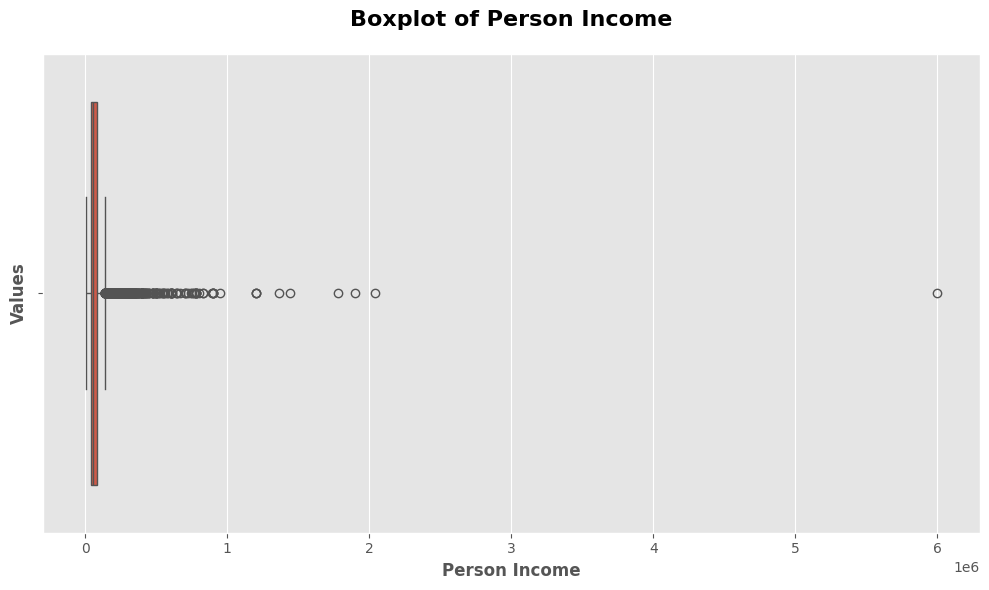

<module 'matplotlib.pyplot' from 'C:\\Users\\amine\\Desktop\\Gestion des Projets\\Credit Risk Assessment Model\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [27]:
create_boxplot(data, "person_income") 

**person_income (Annual Income)**  
The distribution is highly right-skewed with extreme outliers beyond `$200,000`, reaching up to `$6M`. Given the mean is approximately `$66K` and the median is far lower (from previous statistics), this indicates that high-income extremes disproportionately influence the central tendency.

These cases may represent self-employed individuals or misreported values, as such extremes are uncommon in general consumer credit markets.

**Recommendation:**  
Apply log transformation to reduce skewness and stabilize variance for modeling. Alternatively, use Winsorization to cap extreme values without discarding data.

---


## Histogram

In [30]:
def freedman_diaconis_bin_width(data):
    """Calculate optimal bin width using Freedman-Diaconis rule."""
    q75, q25 = np.percentile(data.dropna(), [75 ,25])
    iqr = q75 - q25
    n = len(data.dropna())
    bin_width = 2 * iqr / np.cbrt(n)
    return bin_width

def plot_histogram(data, column, title=None, xlabel=None, ylabel='Frequency', color='#007acc', highlight_threshold=None, note=None):
    """
    Plot a clean, professional histogram using best visualization practices.

    Parameters:
    - data: pandas DataFrame
    - column: str, the name of the numerical column to plot
    - title: str, optional, plot title
    - xlabel: str, optional, x-axis label
    - ylabel: str, default='Frequency'
    - color: str, hex code for bar color
    - highlight_threshold: float, optional, if set, highlights bars beyond this threshold
    - note: str, optional, annotation note to display on the plot
    """
    # Drop NA and remove extreme outliers (optional adjustment point)
    col_data = data[column].dropna()

    # Calculate number of bins using Freedman-Diaconis rule
    bin_width = freedman_diaconis_bin_width(col_data)
    bin_count = int((col_data.max() - col_data.min()) / bin_width) if bin_width > 0 else 30

    # Set plot style
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot histogram
    sns.histplot(col_data, bins=bin_count, color=color, edgecolor='black')

    # Titles and labels
    plt.title(title or f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel or column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Optional annotation
    if note:
        plt.annotate(textwrap.fill(note, width=70), xy=(0.95, 0.95), xycoords='axes fraction',
                     fontsize=10, ha='right', va='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

    # Highlight threshold (e.g., highlight extreme values)
    if highlight_threshold is not None:
        plt.axvline(highlight_threshold, color='red', linestyle='--', lw=2)
        plt.text(highlight_threshold, plt.ylim()[1]*0.9, f'Threshold = {highlight_threshold}',
                 rotation=90, color='red', va='top', ha='right', fontsize=10)

    # Apply clean formatting
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    # Final layout
    plt.tight_layout()
    plt.show()


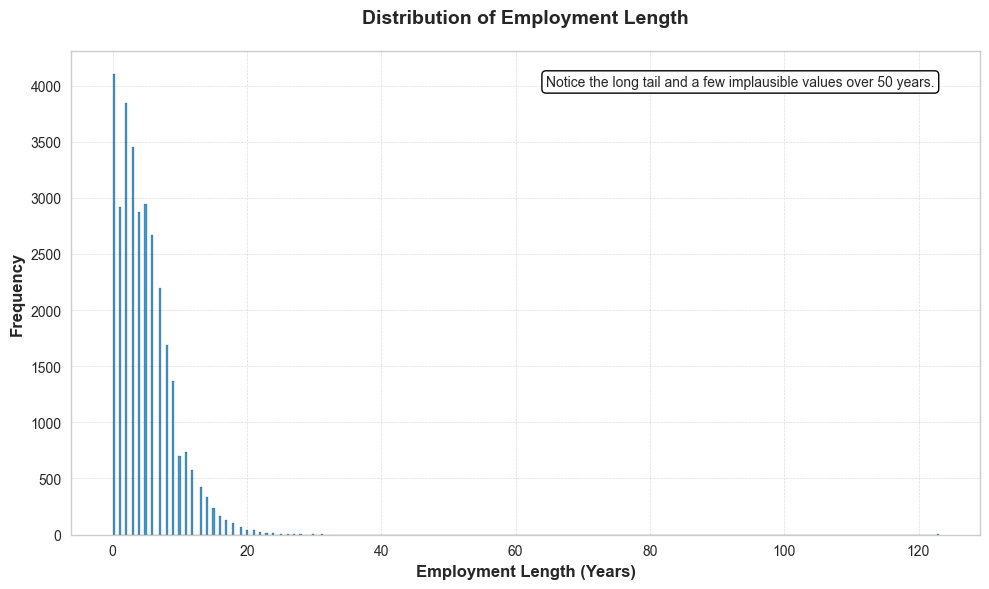

In [31]:
plot_histogram(
    data=data,
    column='person_emp_length',
    title='Distribution of Employment Length',
    xlabel='Employment Length (Years)',
    note='Notice the long tail and a few implausible values over 50 years.'
)


**person_emp_length**  
Confirms prior findings of a right-skewed distribution.  

**New Insight:**  
The concentration below 10 years is more pronounced than expected, indicating that short employment duration is common within this population.

---


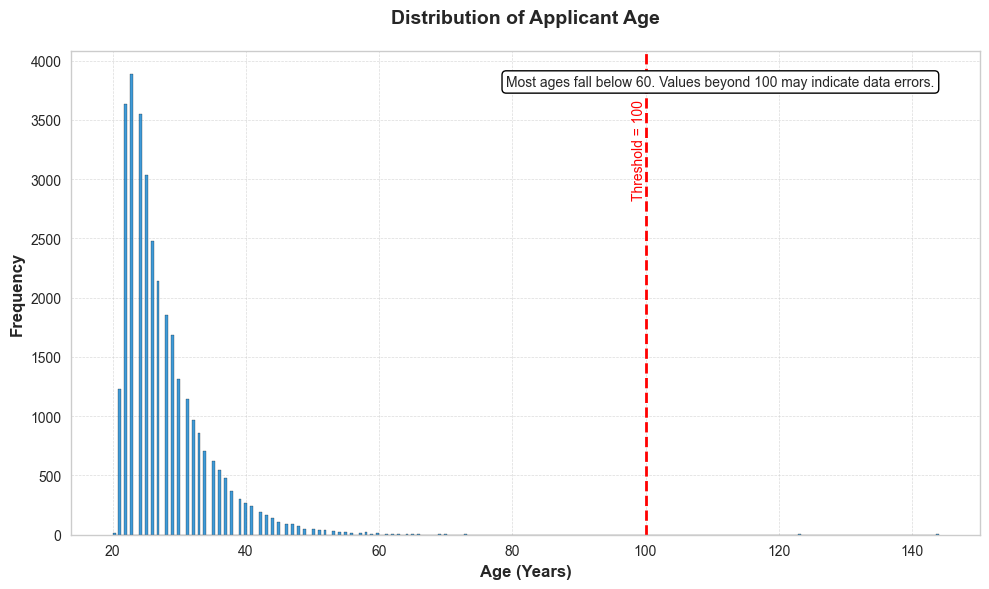

In [32]:
plot_histogram(
    data=data,
    column='person_age',
    title='Distribution of Applicant Age',
    xlabel='Age (Years)',
    highlight_threshold=100,
    note='Most ages fall below 60. Values beyond 100 may indicate data errors.'
)



**person_age**  
No new issues observed beyond what was found in the boxplot.  

**Histogram Confirmation:**  
There is a natural drop-off after age 60 and a small number of extreme values beyond 100, which remain rare and likely erroneous.

---

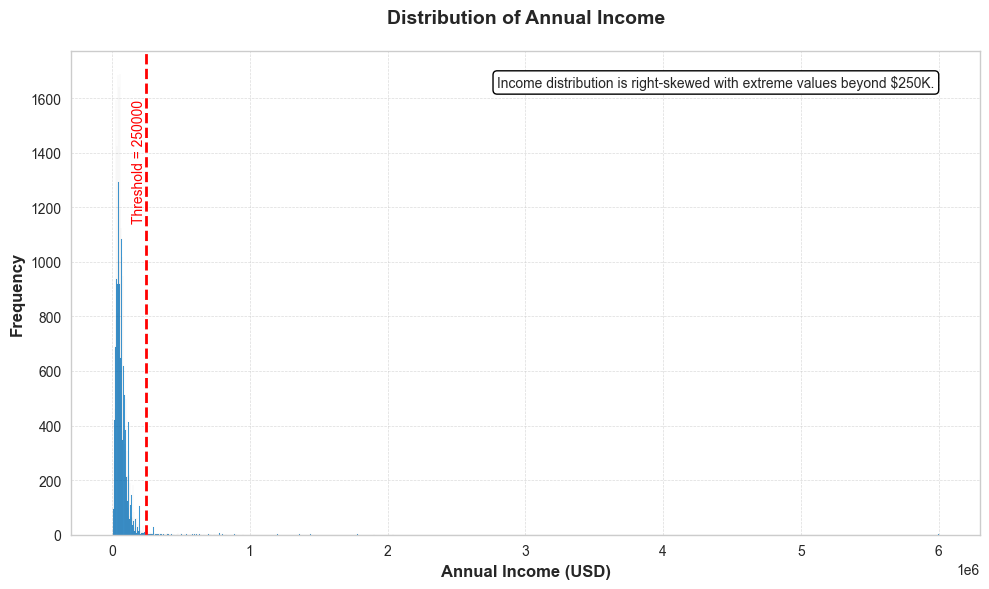

In [33]:
plot_histogram(
    data=data,
    column='person_income',
    title='Distribution of Annual Income',
    xlabel='Annual Income (USD)',
    highlight_threshold=250000,
    note='Income distribution is right-skewed with extreme values beyond $250K.'
)



**person_income**  
Reinforces the previously observed extreme skewness.  

**Additional Clarity:**  
Most applicants earn under `$100K`. Values over `$250K` are very sparse but still exert strong influence on the distribution, further justifying transformation or capping strategies.


# **Summary of Detected Data Quality Issues (Initial EDA)**

**Missing Values**

- **loan_int_rate**: Approximately `9.56%` missing. This is a critical financial feature that may impact model performance if not addressed.
- **person_emp_length**: Approximately `2.75%` missing. While moderate, it remains relevant for employment-related analysis.

---

**Implausible or Invalid Values**

- **person_age**: Values above `100` years are biologically unrealistic and likely the result of data entry errors.
- **person_emp_length**: Values over `120` years exceed logical human working lifespans.
- **person_income**: Some entries exceed `$6` million, representing statistical outliers and possible errors.

---

**Distribution Skewness and Outliers**

- **person_income**: Extremely right-skewed distribution with high variance and influential outliers.
- **person_emp_length** and **person_age**: Long-tailed distributions with sparse, extreme values.

---

**Target Imbalance**

- **loan_status**: Distribution is imbalanced, with `22%` default and `78%` non-default cases. This could introduce bias in classification models.